NOTE: 

- If you are working in Google Colab be sure to upload the meme images into the notebook's left panel. You can run all the cells now

- If you are working with Jupyter notebooks please use the commented 'cv2.imshow(...)' to view the images and comment out the 'cv2_imshow(...)'. Also comment out the 4th line in the next cell

In [ ]:
import cv2
import sys
import numpy as np 
from google.colab.patches import cv2_imshow

We'll begin by looking at our data.

Our data is an image which is composed of 3 color channels (Blue channel, Green channel, Red channel). This just means that we have 3 (n x m) matrices stacked on top of each other to form a (n x m x 3) dim tensor

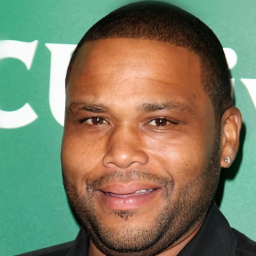

In [ ]:
# view the image
meme1 = cv2.imread('./4.jpg')
# cv2_imshow(meme1)

width = 256
height = 256
dim = (width, height)
 
# resize image
meme1 = cv2.resize(meme1, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(meme1)

Let's check on the dimensions

In [ ]:
shape = meme1.shape
print("This image has",shape[0], "rows and", shape[1], "columns.")
print("This image has", shape[2], "color channels.")

This image has 256 rows and 256 columns.
This image has 3 color channels.


SVD works on a 2-dimensional matrix so we'll choose  one of the color channels thereby creating a grayscale image

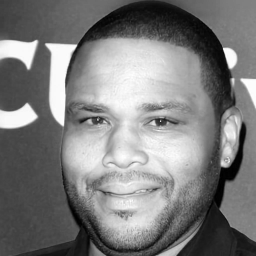

The dimensions of the grayscale image are (256, 256)


In [ ]:
grayscale = meme1[:,:,2]
cv2_imshow(grayscale)
# cv2.imshow("grayscale", grayscale)
print("The dimensions of the grayscale image are", grayscale.shape)

Let's look at the matrix of the image

In [ ]:
print("This looks like the matrix we had for homework 5, right?")
print(grayscale)

This looks like the matrix we had for homework 5, right?
[[ 63  63  63 ... 129 129 129]
 [ 61  61  61 ... 129 129 129]
 [ 61  61  61 ... 129 129 129]
 ...
 [ 74  72  72 ...  38  35  34]
 [ 76  72  72 ...  41  41  37]
 [ 76  72  71 ...  37  37  36]]


Let's perform SVD on this matrix

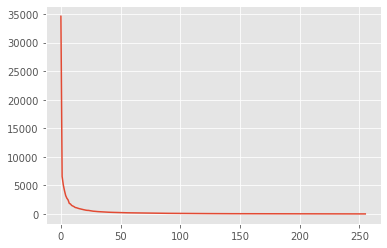

In [ ]:
from scipy.linalg import svd
Up, Sp, Vp = svd(grayscale)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

X = [j for j in range(0,len(Sp))]
plt.plot(X, Sp)
plt.xlabel='Column Index'
plt.xlabel='Sigma Value'

Because we don't know right off the bat what threshold to use we'll have to experiment a little.

In [ ]:
# s = 10

# REMEMBER: grayscale is our original matrix and 
# VPT is the transpose of VT sliced relevant to the highest singular values
Vpt = Vp.T
projection = grayscale.dot(Vpt[:,:20])

Now that we've downsized the data we have changed the way it's represented. Observe the image now

In [ ]:
cv2_imshow(projection)
projection.shape
# cv2.imshow("projection", projection)

(256, 20)

If we want to look at this data in a way that makes sense to the 'human eye' we could do a rank-k approximation

In [ ]:
# create a matrix the same shape as B
Sigma = np.zeros((grayscale.shape[0], grayscale.shape[1]))
# populate Sigma with n x n diagonal matrix
truncated_s = np.zeros(len(Sp))
for i in range(0, 20):
  truncated_s[i] = Sp[i]

for row in range(len(Sp)):
  Sigma[row][row] = truncated_s[row]

In [ ]:
result = np.matmul(Up,Sigma)
result = np.matmul(result,Vp)

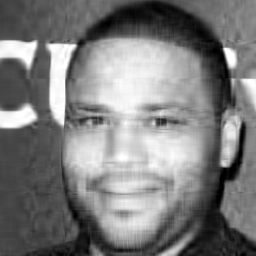

In [ ]:
# view the final result
cv2_imshow(result)
# cv2.imshow("result", result)

With as little as 10 columns you still get a decent representation of the data.

In [ ]:
%cd drive/MyDrive/stargan-v2-tensorflow/dataset/4_domains/train/
!ls

/content/drive/MyDrive/stargan-v2-tensorflow/dataset/4_domains/train
black_men  black_women	resized  resized_women	white_men  white_women


In [ ]:
# 2. sample 500 images from each class
import os
import numpy as np
from scipy.linalg import svd

def svdd(img):
  Up, Sp, Vp = svd(img)
  Vpt = Vp.T
  projection = grayscale.dot(Vpt[:,:20])
  return projection



arr = ["black_men",  "black_women", "white_men", "white_women"]
width = 256
height = 256
dim = (width, height)

for a in arr:
  filenames = os.listdir(a)
  samples = np.random.choice(len(filenames),500, replace=False)
  for s in range(0,len(samples)):
    filepath = a+"/"+filenames[s]
    meme1 = cv2.imread(filepath)
    meme1 = cv2.resize(meme1, dim, interpolation = cv2.INTER_AREA)
    grayscale = meme1[:,:,2]
    projection = svdd(grayscale)
    out_path = "resized/"+filepath
    cv2.imwrite(out_path, projection)




Now that we've gotten the reduced dimensions of 256x20 we want to apply KNN for classification

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import cv2 
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from numpy import array
from sys import getsizeof
import os

def flatten(img):
  #Getting the multi-dimensional array from the image
  array1 = array(img)
  #Using Flatten function on array 1 to convert the multi-dimensional
  # array to 1-D array
  array2 = array1.flatten()
  return array2

data = []
labels = []

def create_data(file_path):
  files = os.listdir(file_path)
  for f in range(0,len(files)):
    outer_path = file_path+"/"+files[f]
    pics = os.listdir(outer_path)
    for p in range(0,len(pics)):
      path = outer_path+"/"+pics[p]
      img = cv2.imread(path)
      label = f
      flattened = flatten(img)

      # add the content into the prospective arrays
      data.append(flattened)
      labels.append(label)

In [ ]:
fp = "resized/"
create_data(fp)

In [ ]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import argparse

In [ ]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.2, random_state=0)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3])

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(trainX, trainY)
neigh.score(testX, testY)

0.375

In [ ]:
()